# X-Education - Lead Scoring

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. Data Loading

In [2]:
# Reading the data
dta = pd.read_csv("Leads.csv")
dta.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
dta.shape

(9240, 37)

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# taking copy of the dataset

dta_copy = dta.copy()

### 2. Data Cleaning

As we can see there are lot of selec tas a cell value in dataframe which means over there option is not selected, hence we can replace those 'select' with null

In [6]:
# Replacing 'select' with null
dta = dta.replace('Select', np.nan)

In [7]:
# dropping duplicate columns if any

dta = dta.drop_duplicates()

In [8]:
dta.shape

(9240, 37)

shape is same as previous so, there are no any duplicate values

In [9]:
# cheking null values in column
dta.isna().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [10]:
# finding percentage of null values
(dta.isna().sum()*100/len(dta)).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
# creating function to drop columns having certain percentage of null values
def drop_cols(dta, perc):
    drop_columns = list(round(100*(dta.isna().sum()/len(dta)), 2) >= perc )
    cols = dta.loc[:,drop_columns].columns
    dta = dta.drop(cols, axis=1)
    return dta

In [12]:
# droping columns where null value percentage > 45%
dta = drop_cols(dta, 45.0)

In [13]:
dta.shape

(9240, 30)

In [14]:
# again finding percentage of null values
(dta.isna().sum()*100/len(dta)).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

Prospect ID and Lead Number are unique identifiers it will not have any impact on model, hence we can simply drop them

Tags and Last Notable Activity columns are added by sales team while working out on leads so it will not have any impact on finding the hot leads, hence we can simply drop them

In [15]:
# Dropping Prospect ID and Lead Number colums
c = ['Prospect ID','Lead Number','Tags','Last Notable Activity']
dta.drop(dta[c], axis=1, inplace=True)

In [16]:
dta.shape

(9240, 26)

In [17]:
# checking columns having unique values
dta.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [18]:
# droping the columns which have only one unique value beacause it will not have any impact on final model

c1 = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
dta.drop(dta[c1], axis=1, inplace=True)

In [19]:
dta.shape

(9240, 21)

In [20]:
dta.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [21]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [22]:
# finding columns which have 2 unique values

unique_two = []
for each in dta.columns:
    if dta[each].nunique() == 2:
        unique_two.append(each)

In [23]:
unique_two

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [24]:
# finding value counts of variables for columns which have 2 unique values

for x in unique_two:
    print (dta[x].value_counts(dropna=False))

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


from above result we can certainely say that there are columns like: 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' having 'No' values more than 95% time. Hence we can simply drop them

In [25]:
c2 = ['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
dta.drop(dta[c2], axis=1, inplace=True)

In [26]:
dta.shape

(9240, 14)

In [27]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

### 3. EDA and Handling of missing values and Outliers

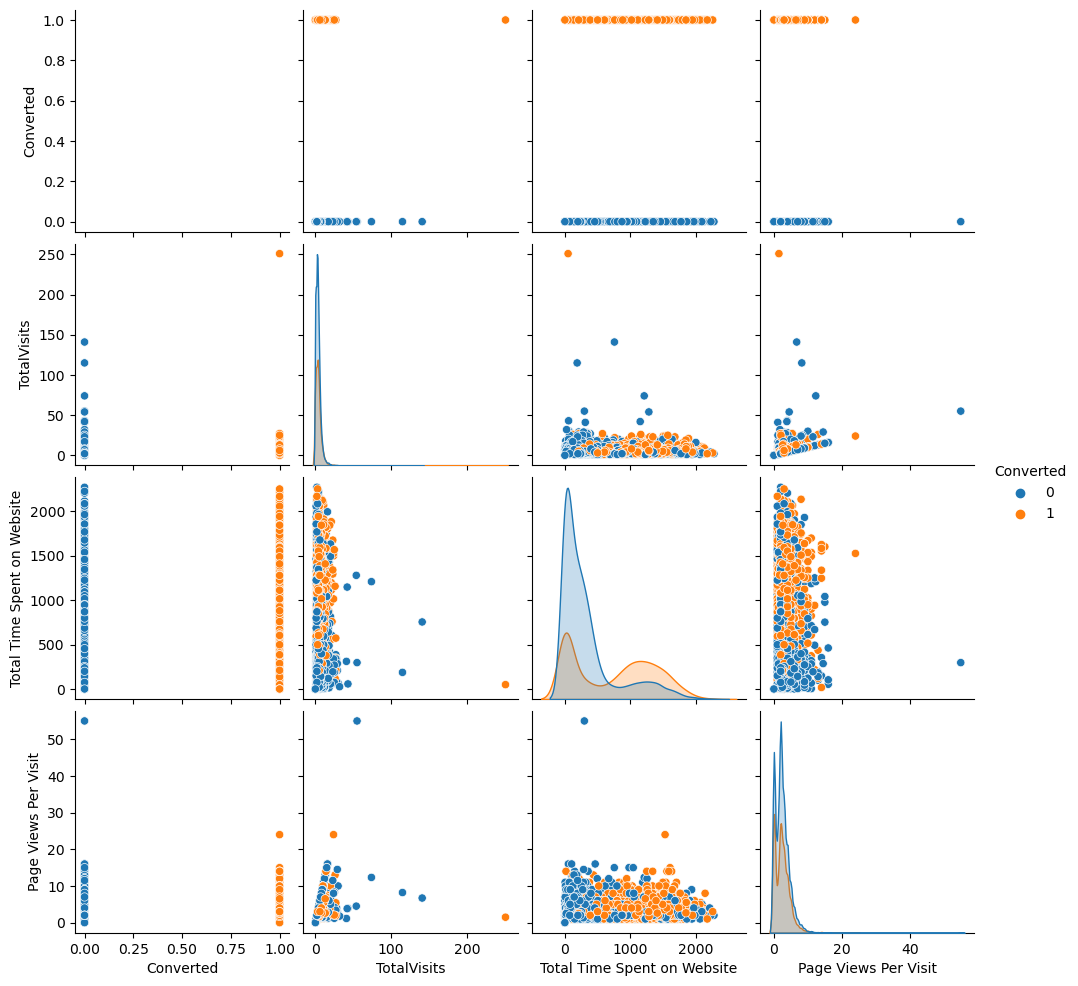

In [28]:
# Let's analyze numerical feature with respect to target variable which is column 'Converted'
sns.pairplot(data=dta, hue='Converted', vars=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])

In [29]:
# checking missing values for numerical columns
dta.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

In [30]:
# imputing missing values with mean for 'TotalVisits','Page Views Per Visit'
dta['TotalVisits'].fillna((dta['TotalVisits'].mean()), inplace=True)
dta['Page Views Per Visit'].fillna((dta['Page Views Per Visit'].mean()), inplace=True)

In [31]:
dta.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

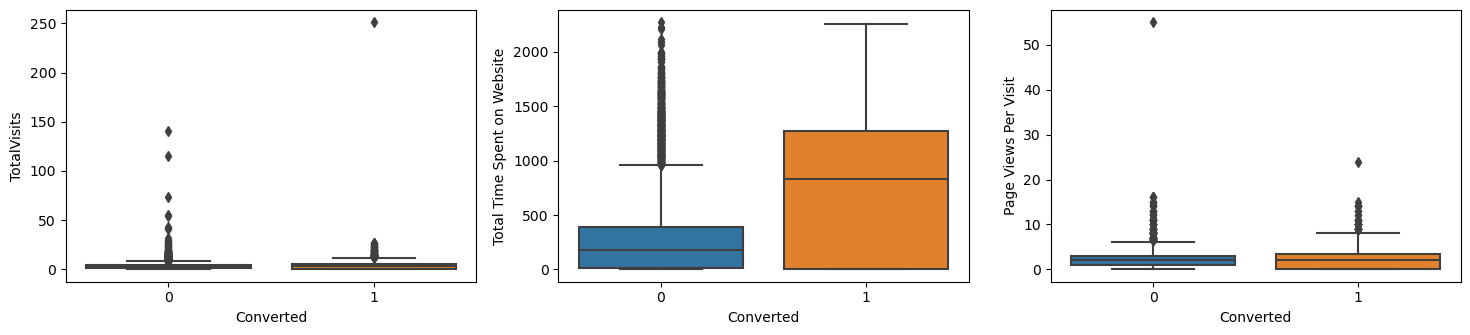

In [32]:
# box plot to see outliers

num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (18, 12))
for i, var in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Converted', y = var, data = dta)

In [33]:
# capping outliers to 0.01 and 0.99

out = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i, var in enumerate(out):
    q1 = dta[var].quantile(0.01)
    q4 = dta[var].quantile(0.99)
    dta[var][dta[var]<=q1] = q1
    dta[var][dta[var]>=q4] = q4

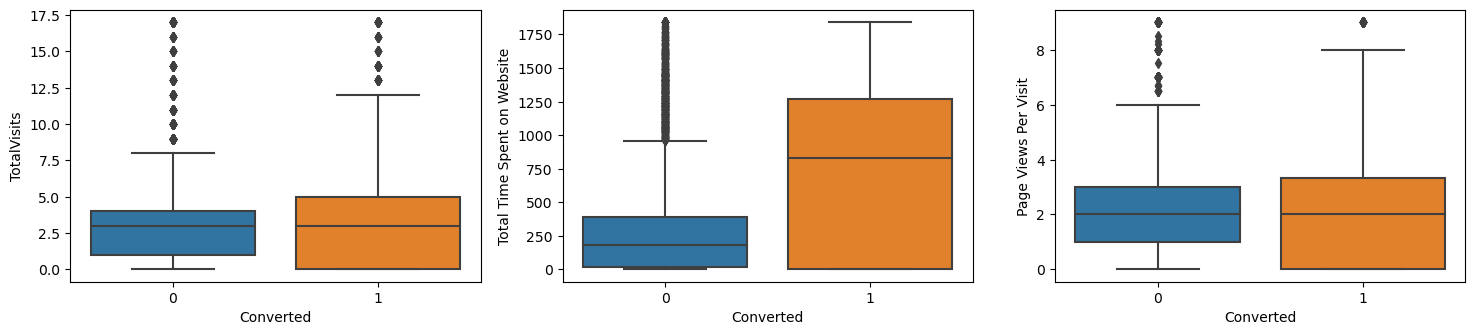

In [34]:
# box plot after capping outliers
plt.figure(figsize = (18, 12))
for i, var in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Converted', y = var, data = dta)

<AxesSubplot:>

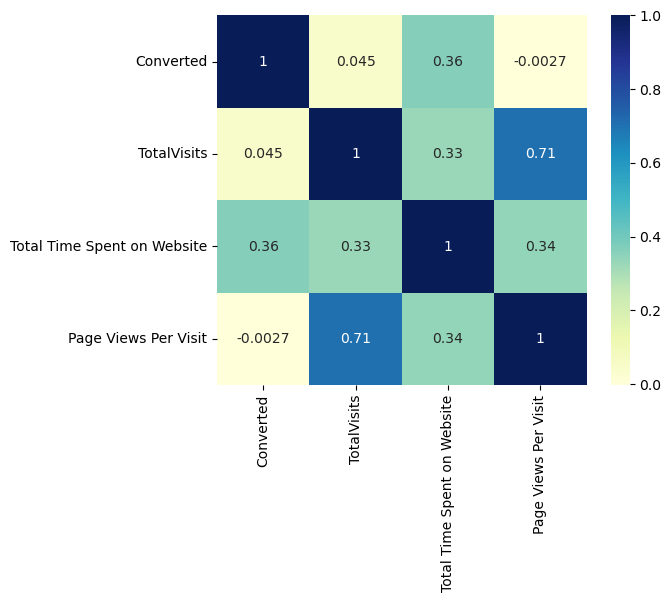

In [35]:
# plotting heatmap
features = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.heatmap(dta[features].corr(), cmap="YlGnBu", annot=True, square=True)

In [36]:
# Let's do EDA  for other remaining columns
Categorical = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','City']

In [37]:
dta[Categorical].nunique().sort_values(ascending = False)

Country                                          38
Lead Source                                      21
Specialization                                   18
Last Activity                                    17
What is your current occupation                   6
City                                              6
Lead Origin                                       5
What matters most to you in choosing a course     3
dtype: int64

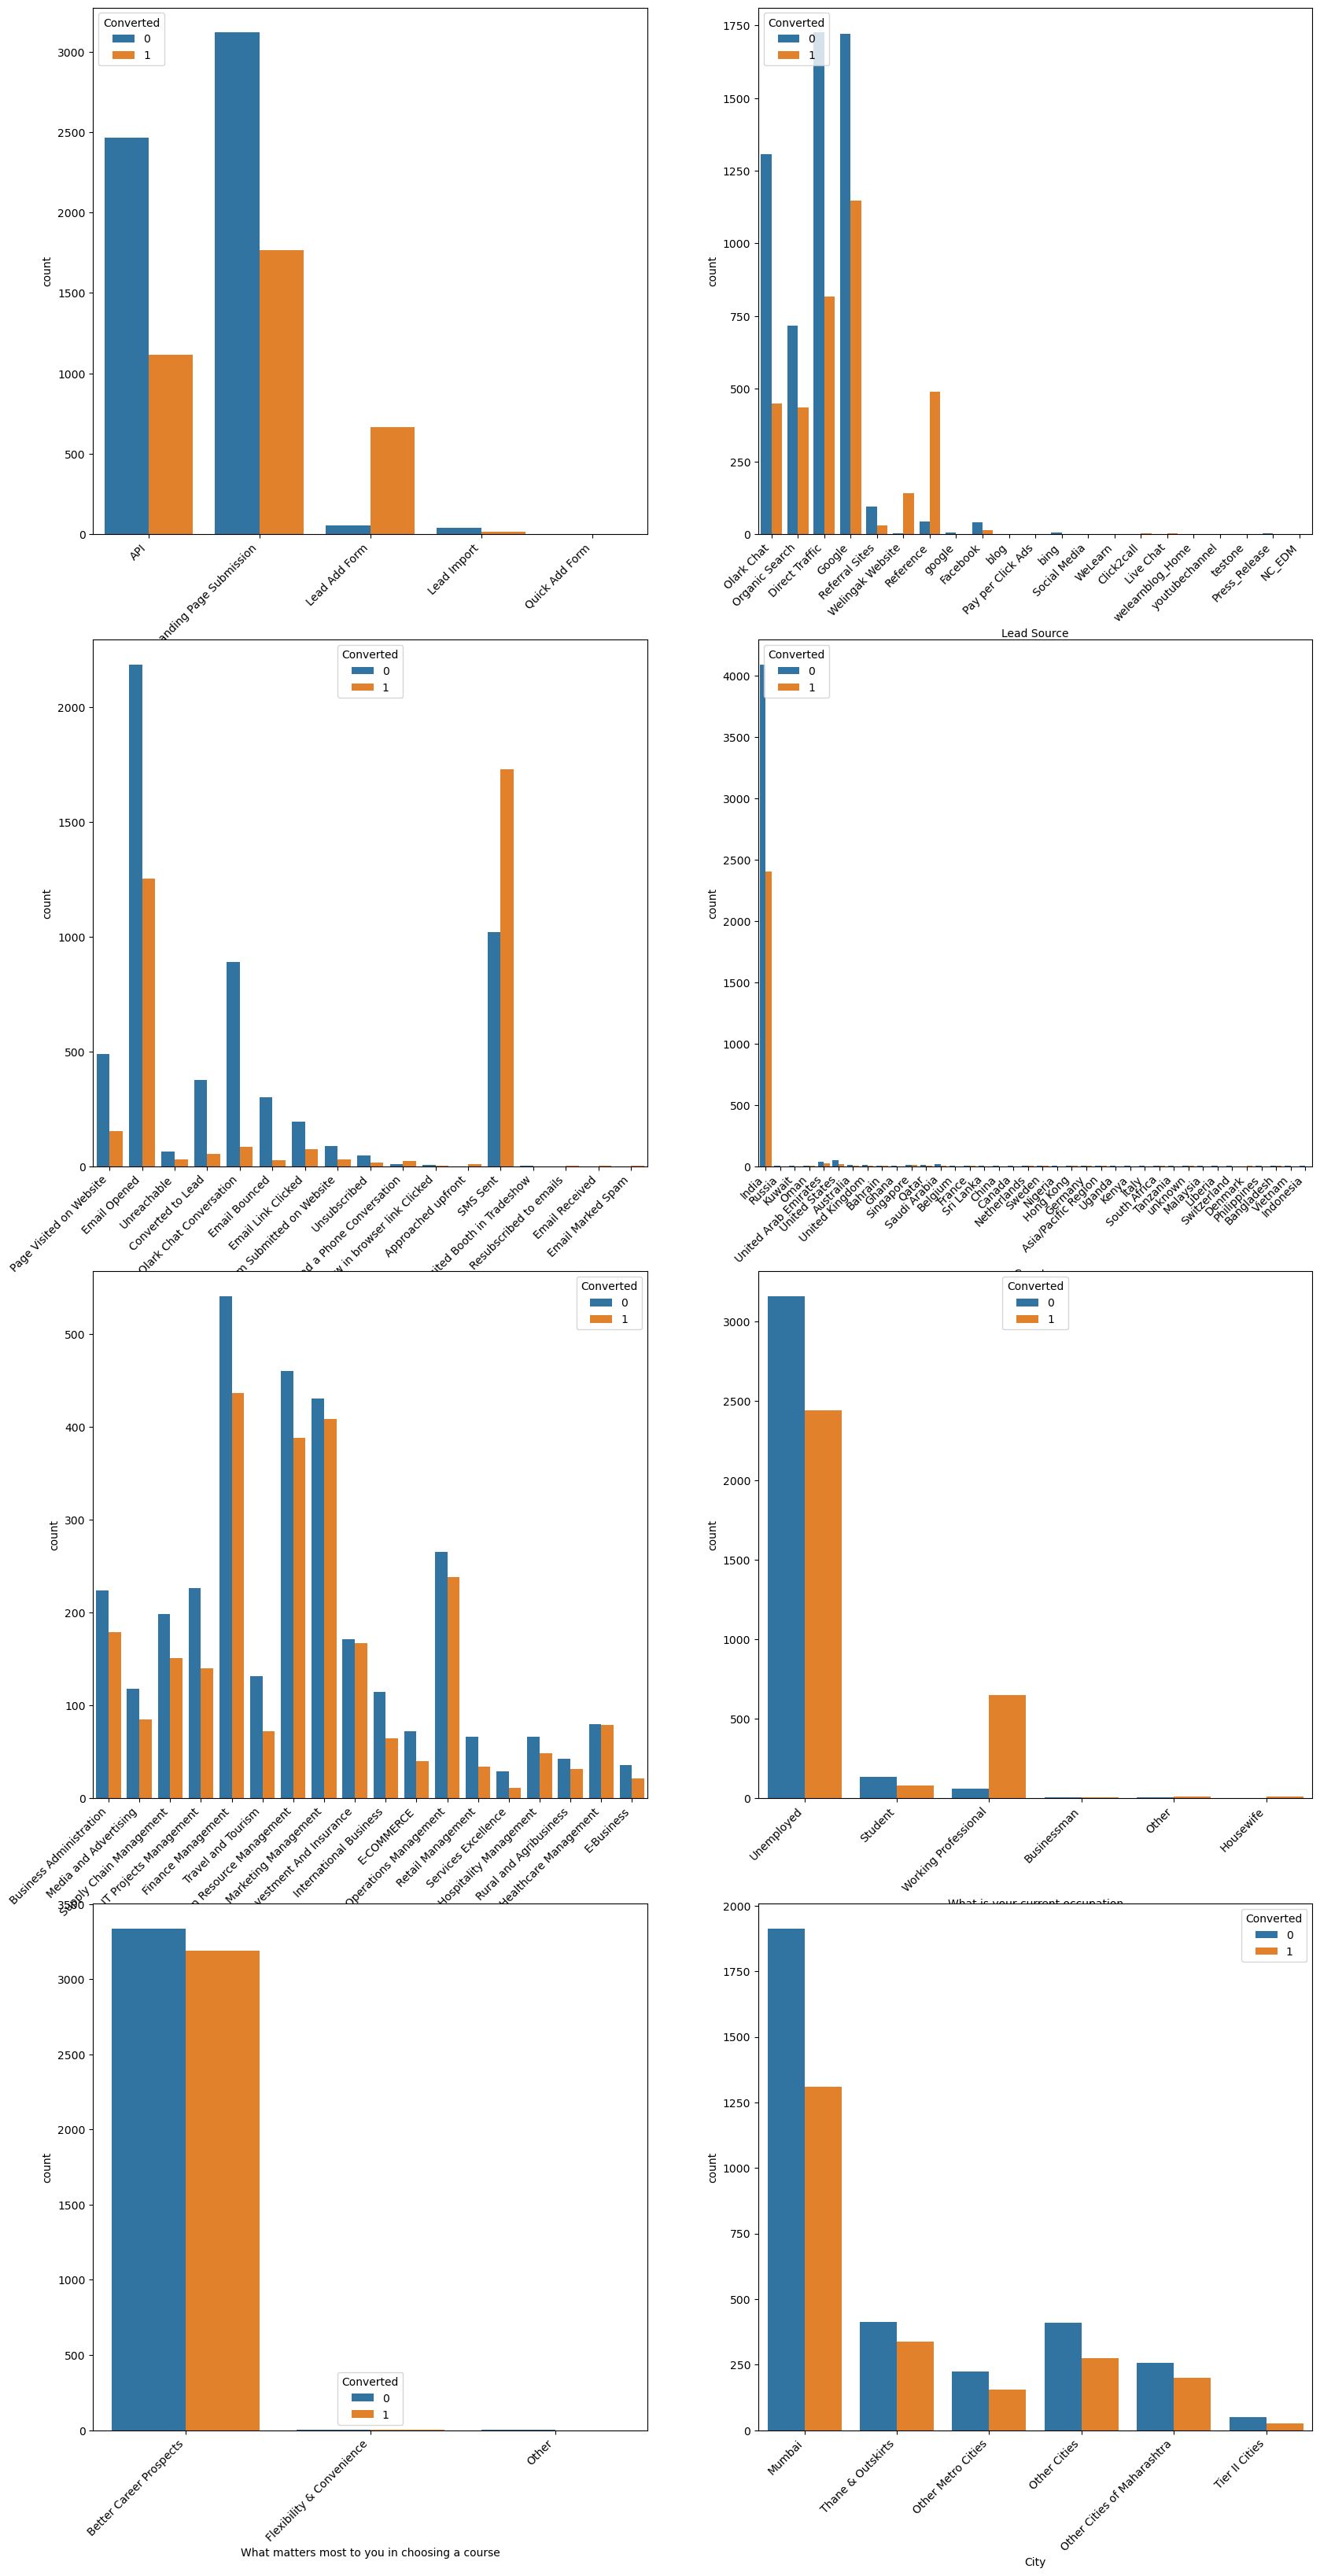

In [38]:
# plotting countplot for categorical variables
plt.figure(figsize = (20, 40))
for i, var in enumerate(Categorical):
    plt.subplot(4,2,i+1)
    c = sns.countplot(x=var, hue = 'Converted', data = dta)
    c.set_xticklabels(c.get_xticklabels(), fontsize=10, rotation=45, ha='right')
    plt.xlabel(var, fontsize=10)
    plt.ylabel('count', fontsize=10)

From above chart we can say that the 'Country' and 'What matters most to you in choosing a course' chart is highly skewed hence we can drop them

In [39]:
# Dropping 'Country' and 'What matters most to you in choosing a course' columns
c3 = ['Country', 'What matters most to you in choosing a course']
dta.drop(c3, axis=1, inplace=True)

In [40]:
dta.isna().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
City                                      3669
A free copy of Mastering The Interview       0
dtype: int64

In [41]:
dta['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [42]:
# Replacing null of city column with 'Mumbai' as mumbai has highest count
dta['City'] = dta['City'].replace(np.nan, 'Mumbai')

In [43]:
dta.nunique().sort_values(ascending = False)

Total Time Spent on Website               1656
Page Views Per Visit                       103
Lead Source                                 21
TotalVisits                                 19
Specialization                              18
Last Activity                               17
What is your current occupation              6
City                                         6
Lead Origin                                  5
Do Not Email                                 2
Converted                                    2
A free copy of Mastering The Interview       2
dtype: int64

In [44]:
# Replacing other categorical columns missing values with word 'Missing' as their unique count is higher and distribution is aslo spread

oth = ['Specialization', 'What is your current occupation', 'Lead Source', 'Last Activity']

for i in oth:
    dta[i].replace(np.nan,'Missing', inplace=True)

In [45]:
# Checking null values again

dta.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

In [46]:
dta['Lead Source'] = dta['Lead Source'].replace(['google'], 'Google')

In [47]:
# Since there are so many categories in the categorical features with less than 2% counts each, we can combine all those categories into one category called 'Others'

cv = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City']
for i in cv:
    replaceFeatures = []
    categories = dta[i].value_counts()
    list1 = dta[i].value_counts().keys().tolist()
    for j, v in enumerate (categories):
        if v <= 200: 
            replaceFeatures.append(list1[j])
    dta[i] = dta[i].replace(replaceFeatures, 'Others')

In [48]:
dta.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview'],
      dtype='object')

### 4. Buiding the Model

In [49]:
dta.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0.0,0.0,Page Visited on Website,Missing,Unemployed,Mumbai,No
1,API,Organic Search,No,0,5.0,674.0,2.5,Email Opened,Missing,Unemployed,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428.0,1.0,Converted to Lead,Missing,Unemployed,Mumbai,No


In [50]:
# Let's convert 'Do Not Email' and 'A free copy of Mastering The Interview' to 0 and 1 in palce of 'No' and 'Yes'

dta['Do Not Email'] = dta['Do Not Email'].map({'Yes': 1, 'No': 0})
dta['A free copy of Mastering The Interview'] = dta['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [51]:
dta.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Missing,Unemployed,Mumbai,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Missing,Unemployed,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Missing,Unemployed,Mumbai,0


In [52]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  City                                    9240 non-null   obje

In [53]:
# Let's Create dummy variable for other category columns

cat = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City']
for each in cat:
    dummy = pd.get_dummies(dta[each], drop_first=False, prefix=each)
    dta = pd.concat([dta,dummy],1)

In [54]:
dta.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Missing,Unemployed,...,0,0,1,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Missing,Unemployed,...,0,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,...,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,Others,Media and Advertising,Unemployed,...,0,0,1,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,Converted to Lead,Missing,Unemployed,...,0,0,1,0,1,0,0,0,0,0


In [55]:
# Dropping the main columns after dummy creation of them
dta.drop(cat, axis = 1, inplace = True)

In [56]:
dta.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
0,0,0,0.0,0.0,0.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,2.0,1532.0,2.0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1.0,305.0,1.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,1,2.0,1428.0,1.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [57]:
dta.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Managemen

In [58]:
# importing libraries for logistic regression

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Creating feature and target variable

X = dta.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
0,0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,5.0,674.0,2.5,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,2.0,1532.0,2.0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305.0,1.0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,2.0,1428.0,1.0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [60]:
y = dta['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Performing Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=101)

In [62]:
# Scaling the Numerical features

Numeric = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = MinMaxScaler()

X_train[Numeric] = scaler.fit_transform(X_train[Numeric])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
4746,0,0.235294,0.011409,0.444444,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
6279,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2352,1,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
723,0,0.294118,0.187981,0.277778,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6375,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [63]:
# Building Logistic regression model with RFE fetures

logmodel = LogisticRegression()

rfe = RFE(logmodel, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [64]:
# Listing RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Missing',
       'What is your current occupation_Missing',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [65]:
# func to create the model by passing the model name and the columns used for the model 

def create_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res

In [66]:
# func to calculate VIF
def calc_VIF(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [67]:
# Iteration - 1

logm1 = LogisticRegression()

res = create_model(logm1, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.5
Date:                Sun, 19 Mar 2023   Deviance:                       5275.0
Time:                        01:49:14   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
5,Lead Origin_Landing Page Submission,157.44
4,Lead Origin_API,118.50
18,What is your current occupation_Unemployed,67.80
16,What is your current occupation_Missing,59.55
6,Lead Origin_Lead Add Form,26.47
19,What is your current occupation_Working Profes...,20.14
17,What is your current occupation_Student,6.86
9,Lead Source_Reference,3.97
15,Specialization_Missing,3.08
7,Lead Origin_Others,2.85


In [68]:
# Droping 'What is your current occupation_Student' based on p value

col = col.drop('What is your current occupation_Student',1)

logm2 = LogisticRegression()

res = create_model(logm2, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.3
Date:                Sun, 19 Mar 2023   Deviance:                       5276.7
Time:                        01:49:14   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
5,Lead Origin_Landing Page Submission,30.05
4,Lead Origin_API,26.67
17,What is your current occupation_Unemployed,10.11
16,What is your current occupation_Missing,9.16
6,Lead Origin_Lead Add Form,8.44
9,Lead Source_Reference,3.97
18,What is your current occupation_Working Profes...,3.83
15,Specialization_Missing,3.07
3,Page Views Per Visit,2.66
8,Lead Source_Olark Chat,2.42


In [69]:
# Droping 'What is your current occupation_Unemployed' based on p value

col = col.drop('What is your current occupation_Unemployed',1)

logm3 = LogisticRegression()

res = create_model(logm3, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.6
Date:                Sun, 19 Mar 2023   Deviance:                       5277.2
Time:                        01:49:14   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4050
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
4,Lead Origin_API,10.90
5,Lead Origin_Landing Page Submission,9.22
6,Lead Origin_Lead Add Form,5.24
9,Lead Source_Reference,3.96
15,Specialization_Missing,3.07
3,Page Views Per Visit,2.66
8,Lead Source_Olark Chat,2.42
12,Last Activity_Email Opened,2.36
1,TotalVisits,2.29
14,Last Activity_SMS Sent,2.22


In [70]:
# Droping 'Last Activity_Email Bounced' based on p value

col = col.drop('Last Activity_Email Bounced',1)

logm4 = LogisticRegression()

res = create_model(logm4, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.9
Date:                Sun, 19 Mar 2023   Deviance:                       5279.9
Time:                        01:49:14   Pearson chi2:                 6.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
4,Lead Origin_API,10.64
5,Lead Origin_Landing Page Submission,8.80
6,Lead Origin_Lead Add Form,5.22
9,Lead Source_Reference,3.96
14,Specialization_Missing,3.07
3,Page Views Per Visit,2.66
8,Lead Source_Olark Chat,2.41
1,TotalVisits,2.26
11,Last Activity_Email Opened,2.26
13,Last Activity_SMS Sent,2.07


In [71]:
# Droping 'Last Activity_Email Bounced' based on VIF values > 5

col = col.drop(['Lead Origin_API','Lead Origin_Landing Page Submission','Lead Origin_Lead Add Form'],1)

logm5 = LogisticRegression()

res = create_model(logm5, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2809.8
Date:                Sun, 19 Mar 2023   Deviance:                       5619.6
Time:                        01:49:14   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.53
1,TotalVisits,4.42
8,Last Activity_Email Opened,2.24
11,Specialization_Missing,2.23
5,Lead Source_Olark Chat,2.22
2,Total Time Spent on Website,2.12
10,Last Activity_SMS Sent,1.98
9,Last Activity_Olark Chat Conversation,1.71
12,What is your current occupation_Missing,1.55
13,What is your current occupation_Working Profes...,1.22


In [72]:
# Droping 'Lead Origin_Others' based on p value

col = col.drop('Lead Origin_Others',1)

logm6 = LogisticRegression()

res = create_model(logm6, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.7
Date:                Sun, 19 Mar 2023   Deviance:                       5621.5
Time:                        01:49:14   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.53
1,TotalVisits,4.42
7,Last Activity_Email Opened,2.24
4,Lead Source_Olark Chat,2.21
10,Specialization_Missing,2.21
2,Total Time Spent on Website,2.12
9,Last Activity_SMS Sent,1.98
8,Last Activity_Olark Chat Conversation,1.71
11,What is your current occupation_Missing,1.55
12,What is your current occupation_Working Profes...,1.22


In [73]:
# Droping 'Specialization_Missing' based on p value

col = col.drop('Specialization_Missing',1)

logm7 = LogisticRegression()

res = create_model(logm7, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.7
Date:                Sun, 19 Mar 2023   Deviance:                       5621.5
Time:                        01:49:14   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
3,Page Views Per Visit,5.51
1,TotalVisits,4.42
7,Last Activity_Email Opened,2.13
2,Total Time Spent on Website,2.12
4,Lead Source_Olark Chat,1.89
9,Last Activity_SMS Sent,1.87
8,Last Activity_Olark Chat Conversation,1.60
10,What is your current occupation_Missing,1.51
11,What is your current occupation_Working Profes...,1.20
5,Lead Source_Reference,1.18


In [74]:
# Droping 'Page Views Per Visit' based on higher VIF

col = col.drop('Page Views Per Visit',1)

logm8 = LogisticRegression()

res = create_model(logm8, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.4
Date:                Sun, 19 Mar 2023   Deviance:                       5668.8
Time:                        01:49:15   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,TotalVisits,2.28
2,Total Time Spent on Website,2.08
6,Last Activity_Email Opened,1.91
3,Lead Source_Olark Chat,1.79
8,Last Activity_SMS Sent,1.69
7,Last Activity_Olark Chat Conversation,1.57
9,What is your current occupation_Missing,1.50
10,What is your current occupation_Working Profes...,1.20
4,Lead Source_Reference,1.16
0,Do Not Email,1.10


In [75]:
# Droping 'Specialization_Missing' based on p value

col = col.drop('TotalVisits',1)

logm8 = LogisticRegression()

res = create_model(logm8, col)

calc_VIF(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.5
Date:                Sun, 19 Mar 2023   Deviance:                       5668.9
Time:                        01:49:15   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3678
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,1.81
2,Lead Source_Olark Chat,1.67
5,Last Activity_Email Opened,1.64
7,Last Activity_SMS Sent,1.54
6,Last Activity_Olark Chat Conversation,1.52
8,What is your current occupation_Missing,1.47
9,What is your current occupation_Working Profes...,1.20
3,Lead Source_Reference,1.15
0,Do Not Email,1.07
4,Last Activity_Converted to Lead,1.05


Now i can be said that now feature mentioned above is important 

In [76]:
# Getting the predicted values on the train set

X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4746    0.398654
6279    0.790587
2352    0.010714
723     0.259950
6375    0.966477
2827    0.419548
5030    0.655328
114     0.407560
7050    0.592844
6516    0.056874
dtype: float64

In [77]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
4746,0,0.398654,4746
6279,1,0.790587,6279
2352,0,0.010714,2352
723,0,0.259950,723
6375,1,0.966477,6375


In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
4746,0,0.398654,4746,0
6279,1,0.790587,6279,1
2352,0,0.010714,2352,0
723,0,0.259950,723,0
6375,1,0.966477,6375,1


### 5. Model Evalution

In [79]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [80]:
# defining function to get the metrices

def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0] 
    TP = confusion[1,1] 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) 
    Specificity = TN / float(TN+FP) 
    Precision   = TP / float(TP+FP) 
    Recall      = TN / float(TN+FP) 
    FPR = (FP/ float(TN+FP))        
    PPV = (TP / float(TP+FP))        
    NPV = (TN / float(TN+ FN))      
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')

In [81]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[3442  521]
 [ 845 1660]]
The Accuracy is    : 0.79 (0.7888064316635746)
The Sensitivity is : 0.66 (0.6626746506986028)
The Specificity is : 0.87 (0.8685339389351502)
The Precision is   : 0.76 (0.761118752865658)
The Recall is      : 0.87 (0.8685339389351502)
The f1 score is    : 0.81 (0.8112863210054082)
The False Positive Rate is       : 0.13 (0.13146606106484987)
The Positive Predictive Value is : 0.76 (0.761118752865658)
The Negative Predictive Value is : 0.8 (0.8028924655936552)


In [82]:
# Ploting ROC Curve for initial cut off

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

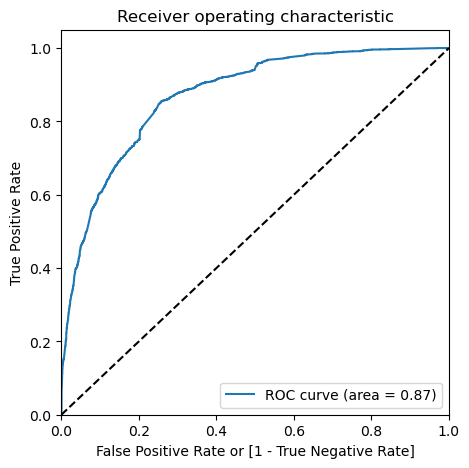

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [85]:
# finding the Optimal Cut off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4746,0,0.398654,4746,0,1,1,1,1,0,0,0,0,0,0
6279,1,0.790587,6279,1,1,1,1,1,1,1,1,1,0,0
2352,0,0.010714,2352,0,1,0,0,0,0,0,0,0,0,0
723,0,0.259950,723,0,1,1,1,0,0,0,0,0,0,0
6375,1,0.966477,6375,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Ploting Sensitivity - Specificity for various probabilities

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
   
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1 
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.387291     1.000000     0.000000
0.1          0.1  0.597093     0.983633     0.352763
0.2          0.2  0.721861     0.912575     0.601312
0.3          0.3  0.778757     0.859880     0.727479
0.4          0.4  0.783395     0.743313     0.808731
0.5          0.5  0.788806     0.662675     0.868534
0.6          0.6  0.781540     0.577645     0.910421
0.7          0.7  0.760668     0.466267     0.946758
0.8          0.8  0.728510     0.346108     0.970225
0.9          0.9  0.691095     0.222754     0.987131


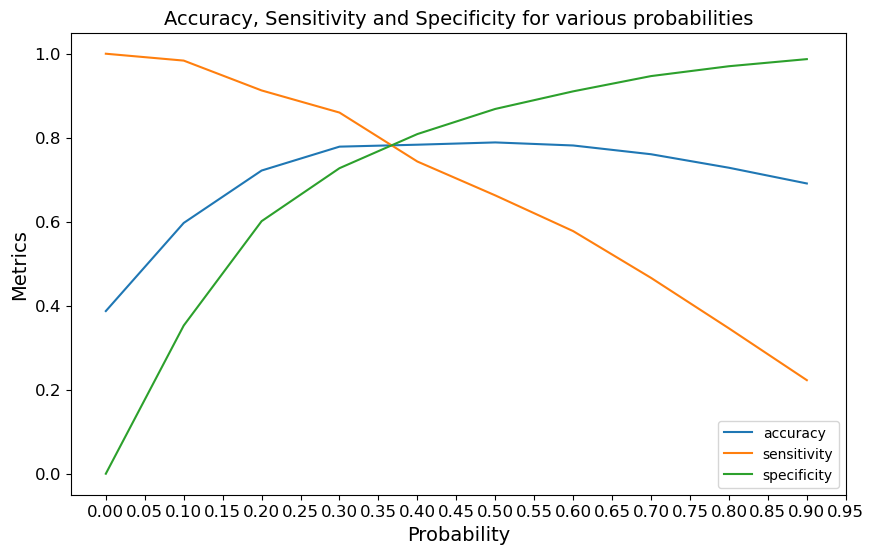

In [87]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

From above chart we can say that 0.36 would be the optimal cut off

In [88]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
4746,0,0.398654,4746,0,1,1,1,1,0,0,0,0,0,0,1
6279,1,0.790587,6279,1,1,1,1,1,1,1,1,1,0,0,1
2352,0,0.010714,2352,0,1,0,0,0,0,0,0,0,0,0,0
723,0,0.259950,723,0,1,1,1,0,0,0,0,0,0,0,0
6375,1,0.966477,6375,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Priniting all the necessary Metrics for the Training dataset for cut-off 0.36

get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Confusion Matrix is 
 [[3019  944]
 [ 445 2060]]
The Accuracy is    : 0.79 (0.7852504638218923)
The Sensitivity is : 0.82 (0.8223552894211577)
The Specificity is : 0.76 (0.7617966187231895)
The Precision is   : 0.69 (0.6857523302263648)
The Recall is      : 0.76 (0.7617966187231895)
The f1 score is    : 0.72 (0.7217770519291753)
The False Positive Rate is       : 0.24 (0.2382033812768105)
The Positive Predictive Value is : 0.69 (0.6857523302263648)
The Negative Predictive Value is : 0.87 (0.8715357967667436)


In [90]:
# Assigning Lead Score based on Prediction

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
4746,0,0.398654,4746,1,40
6279,1,0.790587,6279,1,79
2352,0,0.010714,2352,0,1
723,0,0.259950,723,0,26
6375,1,0.966477,6375,1,97


In [91]:
# Making Prediction for Test data set

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
4637,0,2.0,69.0,2.0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
356,0,5.0,1216.0,2.5,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8615,1,2.0,267.0,2.0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
7115,0,10.0,144.0,5.0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5743,1,6.0,378.0,3.0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [92]:
# Scaling for numerical variables

X_test[Numeric] = scaler.transform(X_test[Numeric])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,...,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
4637,0,0.117647,0.037488,0.222222,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
356,0,0.294118,0.660651,0.277778,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8615,1,0.117647,0.145061,0.222222,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
7115,0,0.588235,0.078235,0.555556,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5743,1,0.352941,0.205367,0.333333,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [93]:
X_test.shape

(2772, 46)

In [94]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Missing',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [95]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Missing,What is your current occupation_Working Professional
4637,0,0.037488,0,0,0,0,0,0,0,0
356,0,0.660651,0,0,0,1,0,0,0,1
8615,1,0.145061,0,0,0,0,0,1,0,0
7115,0,0.078235,0,0,0,0,0,0,0,0
5743,1,0.205367,0,0,0,0,0,1,0,0


In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred.head()

4637    0.131725
356     0.946469
8615    0.231205
7115    0.147609
5743    0.267825
dtype: float64

In [98]:
# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.131725,4637
1,1,0.946469,356
2,0,0.231205,8615
3,0,0.147609,7115
4,0,0.267825,5743
5,1,0.570093,3711
6,1,0.929307,943
7,0,0.035536,4236
8,0,0.206501,4225
9,1,0.264426,4635


In [99]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4637,0,0.131725,13
1,356,1,0.946469,95
2,8615,0,0.231205,23
3,7115,0,0.147609,15
4,5743,0,0.267825,27


In [100]:
# Predict the final y values based on the threshold of 0.36
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.36 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4637,0,0.131725,13,0
1,356,1,0.946469,95,1
2,8615,0,0.231205,23,0
3,7115,0,0.147609,15,0
4,5743,0,0.267825,27,0


In [101]:
# final evalution metrics for test dataset

get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Confusion Matrix is 
 [[1315  401]
 [ 168  888]]
The Accuracy is    : 0.79 (0.7947330447330447)
The Sensitivity is : 0.84 (0.8409090909090909)
The Specificity is : 0.77 (0.7663170163170163)
The Precision is   : 0.69 (0.6889061287820015)
The Recall is      : 0.77 (0.7663170163170163)
The f1 score is    : 0.73 (0.7255526286929808)
The False Positive Rate is       : 0.23 (0.23368298368298368)
The Positive Predictive Value is : 0.69 (0.6889061287820015)
The Negative Predictive Value is : 0.89 (0.8867161159811193)


In [102]:
# Assigning Lead score to original data

y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)
df_score.set_index('Prospect ID', inplace=True)

In [103]:
df_score.head()

,Lead_Score
Prospect ID,
4746,40
6279,79
2352,1
723,26
6375,97


In [104]:
pd.concat([dta_copy,df_score], axis = 1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,29
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,39
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,74
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,19
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam,50
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent,49
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent,21
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent,29


In [105]:
# determining feature importance

model_params = res.params[1:]
model_params

Do Not Email                                           -1.224438
Total Time Spent on Website                             3.247247
Lead Source_Olark Chat                                  1.090668
Lead Source_Reference                                   2.985116
Last Activity_Converted to Lead                        -0.851993
Last Activity_Email Opened                              0.350877
Last Activity_Olark Chat Conversation                  -1.062652
Last Activity_SMS Sent                                  1.559400
What is your current occupation_Missing                -1.321504
What is your current occupation_Working Professional    2.383833
dtype: float64

In [106]:
feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -37.706945
Total Time Spent on Website                             100.000000
Lead Source_Olark Chat                                   33.587468
Lead Source_Reference                                    91.927583
Last Activity_Converted to Lead                         -26.237397
Last Activity_Email Opened                               10.805369
Last Activity_Olark Chat Conversation                   -32.724692
Last Activity_SMS Sent                                   48.022226
What is your current occupation_Missing                 -40.696131
What is your current occupation_Working Professional     73.410892
dtype: float64

In [108]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            8
Total Time Spent on Website                             0
Lead Source_Olark Chat                                  6
Lead Source_Reference                                   4
Last Activity_Converted to Lead                         5
Last Activity_Email Opened                              2
Last Activity_Olark Chat Conversation                   7
Last Activity_SMS Sent                                  9
What is your current occupation_Missing                 3
What is your current occupation_Working Professional    1
dtype: int64

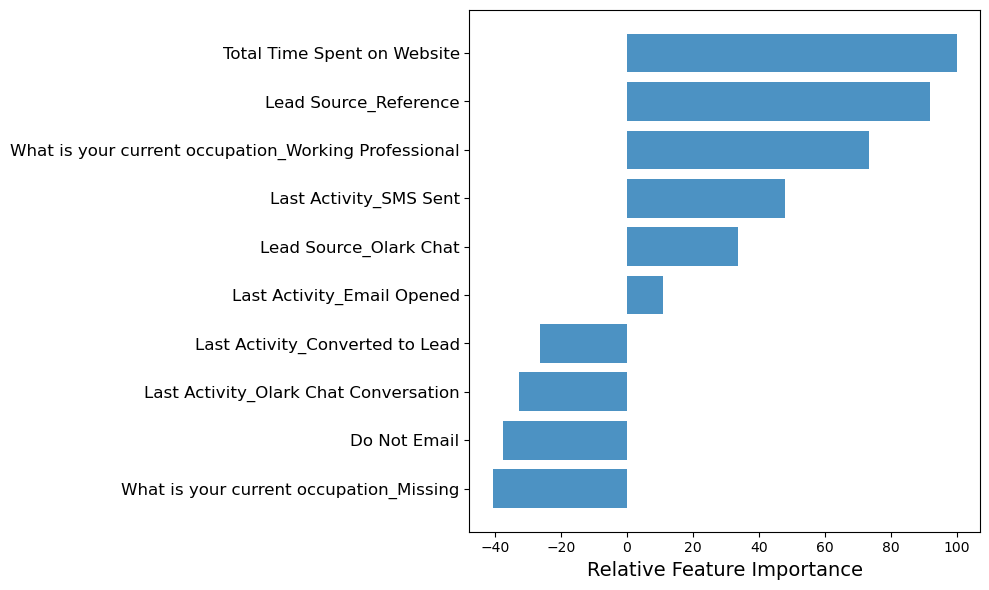

In [110]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

#### Below Conclusion can be made from above analysis

X-Education has better chance for converting potential lead when,

1. Total Time spent on website is higher
2. 